# Modeling and Simulation in Python

Chapter 1:

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [2]:
# If you want the figures to appear in the notebook, use
# %matplotlib notebook

# If you want the figures to appear in separate windows, use
# %matplotlib qt

# To switch from one to another, you have to select Kernel->Restart

%matplotlib notebook

from modsim import *

## Modeling a bikeshare system

In [3]:
bikeshare = State(olin=10, wellesley=2)

In [4]:
bikeshare.olin

10

In [5]:
bikeshare.wellesley

2

In [6]:
print_state(bikeshare)

wellesley = 2
olin = 10


**Exercise:** Add a third attribute called `babson` with initial value 0, and print the state of `bikeshare` again.

## Plotting

In [6]:
newfig()
plot(bikeshare.olin, 'rs-')
plot(bikeshare.wellesley, 'bo-')

In [7]:
bikeshare.olin -= 1
bikeshare.wellesley += 1

In [8]:
plot(bikeshare.olin, 'rs-')
plot(bikeshare.wellesley, 'bo-')

**Exercise:** Read the [documentation of the Matplotlib function `plot`](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) and modify these lines to plot different shapes with different colors.

## Functions

In [11]:
def bike_to_wellesley():
    bikeshare.olin -= 1
    bikeshare.wellesley += 1

In [12]:
def plot_state():
    plot(bikeshare.olin, 'rs-', label='Olin')
    plot(bikeshare.wellesley, 'bo-', label='Wellesley')

<IPython.core.display.Javascript object>


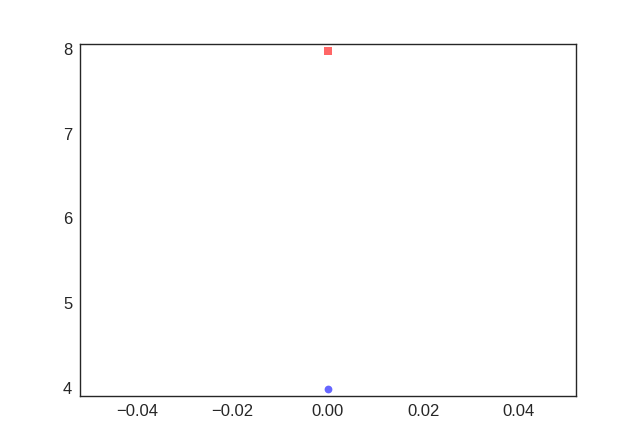

In [13]:
bike_to_wellesley()
plot_state()

In [14]:
bike_to_wellesley

<function __main__.bike_to_wellesley>

**Exercise:** Define a function called `bike_to_olin` that moves a bike from Wellesley to Olin.  Call the new function and print or plot the results to confirm that it works.

In [12]:
# Solution

def bike_to_olin():
    bikeshare.wellesley -= 1
    bikeshare.olin += 1
    
bike_to_olin()
plot_state()

## Parameters

In [14]:
def move_bike(n):
    bikeshare.olin -= n
    bikeshare.wellesley += n
    
def bike_to_wellesley():
    move_bike(1)
    
def bike_to_olin():
    move_bike(-1)

In [15]:
bike_to_wellesley()
plot_state()

In [16]:
bike_to_olin()
plot_state()

In [17]:
label_axes(title='Olin-Wellesley Bikeshare',
           xlabel='Time step (min)', 
           ylabel='Number of bikes')

In [18]:
savefig('chap01_01.pdf')

**Exercise:** The following function definitions start with print statements so they display messages when they run.  Call each of these functions (with appropriate arguments) and confirm that they do what you expect.

Adding print statements like this to functions is a useful debugging technique.  Keep it in mind!


In [21]:
def move_bike_debug(n):
    print('Running move_bike with argument', n)
    bikeshare.olin -= n
    bikeshare.wellesley += n
    
def bike_to_wellesley_debug():
    print('Running bike_to_wellesley')
    move_bike_debug(1)
    
def bike_to_olin_debug():
    print('Running bike_to_olin')
    move_bike_debug(-1)

In [22]:
# Solution

move_bike_debug(1)

Running move_bike with argument 1


In [23]:
# Solution

bike_to_wellesley_debug()

Running bike_to_wellesley
Running move_bike with argument 1


In [24]:
# Solution

bike_to_olin_debug()

Running bike_to_olin
Running move_bike with argument -1


## Conditionals

In [19]:
bikeshare = State(olin=10, wellesley=2)
newfig()
plot_state()

In [20]:
flip(0.5)

True

In [21]:
if flip(0.5):
    print('heads')

heads


In [22]:
if flip(0.5):
    print('heads')
else:
    print('tails')

heads


In [23]:
if flip(0.5):
    bike_to_wellesley()

plot_state()

In [24]:
if flip(0.5):
    bike_to_olin()

plot_state()

In [25]:
def step():
    if flip(0.5):
        bike_to_wellesley()
    
    if flip(0.5):
        bike_to_olin()

In [26]:
step()
plot_state()

## Optional parameters

In [27]:
def step(p1=0.5, p2=0.5):
    if flip(p1):
        bike_to_wellesley()
    
    if flip(p2):
        bike_to_olin()

In [28]:
step()
plot_state()

In [29]:
step(0.4)
plot_state()

In [30]:
step(0.4, 0.2)
plot_state()

In [31]:
step(p1=0.4, p2=0.2)
plot_state()

In [32]:
step(0.4, p2=0.2)
plot_state()

In [33]:
step(p2=0.2)
plot_state()

In [34]:
# SyntaxError: positional argument follows keyword argument

#step(p1=0.4, 0.2)
#plot_state()

In [35]:
def decorate():
    legend(loc='center right')
    label_axes(title='Olin-Wellesley Bikeshare',
               xlabel='Time step (min)', 
               ylabel='Number of bikes')

In [36]:
decorate()

## For loop

In [37]:
bikeshare = State(olin=10, wellesley=2)
newfig()
plot_state()
decorate()

In [38]:
for i in range(4):
    bike_to_wellesley()
    plot_state()

In [39]:
for i in range(4):
    step()
    plot_state()

In [40]:
for i in range(20):
    step(p1=0.4, p2=0.2)
    plot_state()

**Exercise:** Combine the examples from the previous two sections to write a function named `run_steps` that takes three parameters, named `iters`, `p1`, and `p2`.  It should use a for loop to call `step` the number of times specified by `iters`, passing along the specified values of `p1` and `p2`.  After each step, it should plot the updated state.

Test your function by creating a new `State` object, creating a new figure, and calling `run_steps`.

In [42]:
# Solution

def run_steps(iters=1, p1=0.5, p2=0.5):
    for i in range(iters):
        step(p1, p2)
        plot_state()

In [ ]:
# Solution

bikeshare = State(olin=10, wellesley=2)
newfig()
plot_state()
decorate()
run_steps(60, 0.4, 0.2)

## Reality check

In [41]:
def move_bike(n):
    if bikeshare.olin - n < 0:
        return
    if bikeshare.wellesley + n < 0:
        return
    
    bikeshare.olin -= n
    bikeshare.wellesley += n

In [43]:
bikeshare = State(olin=10, wellesley=2)
newfig()
plot_state()
decorate()
run_steps(60, 0.4, 0.2)

## Metrics

In [44]:
bikeshare = State(olin=10, wellesley=2, 
                  olin_empty=0, wellesley_empty=0)

In [45]:
def move_bike(n):
    if bikeshare.olin - n < 0:
        bikeshare.olin_empty += 1
        return
    if bikeshare.wellesley + n < 0:
        bikeshare.wellesley_empty += 1
        return
    
    bikeshare.olin -= n
    bikeshare.wellesley += n

In [46]:
newfig()
plot_state()
decorate()
run_steps(60, 0.4, 0.2)

In [47]:
bikeshare.olin_empty

9

In [48]:
bikeshare.wellesley_empty

0